In [6]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

In [7]:
# Nombre del archivo CSV
path_csv = '../data/csv/history.csv'

# Listas para almacenar los valores de las columnas 's' y 'reward'
sy_values = []
sx_values = []
a_values = []
sy1_values = []
sx1_values = []
reward_values = []

In [8]:
# Leer el archivo CSV
with open(path_csv, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Quitar la primera fila donde están los nombres de las columnas

    for row in csv_reader:
        step, y, x, action, next_y, next_x, reward, done =  row
        sy_values.append(float(y))
        sx_values.append(float(x))
        a_values.append(float(action))
        sy1_values.append(float(next_y))
        sx1_values.append(float(next_x))
        reward_values.append(float(reward))

In [9]:
# Convertir las listas en NumPy arrays
sy_array = np.array(sy_values)
sx_array = np.array(sx_values)
a_array = np.array(a_values)
sy1_array = np.array(sy1_values)
sx1_array = np.array(sx1_values)
reward_array = np.array(reward_values)

In [10]:
input_data1 = np.column_stack((sy_array, sx_array, a_array))
target_data1 = np.column_stack((sy1_array, sx1_array))
input_data2 = input_data1
target_data2 = reward_array

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(input_data1, target_data1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_data2, target_data2, test_size=0.2, random_state=42)

In [15]:
oculta1 = keras.layers.Dense(units=48, input_shape=(3,), activation='relu')
oculta2 = keras.layers.Dense(units=100, activation='relu')
oculta3 = keras.layers.Dense(units=50, activation='relu')
salida1 = keras.layers.Dense(units=2)
salida2 = keras.layers.Dense(units=1)

modelo1 = keras.Sequential([oculta1, salida1])
modelo2 = keras.Sequential([oculta1, salida2])

modelo1.compile(optimizer='adam', loss='mean_squared_error')
modelo2.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
historial1 = modelo1.fit(X_train1, y_train1, epochs=50, batch_size=32, verbose=False, validation_data=(X_test1, y_test1))
print("Modelo entrenado!")

Modelo entrenado!


In [17]:
test_loss1 = modelo1.evaluate(X_test1, y_test1)
print(f'Test loss: {test_loss1}')

182/182 [==============================] - 0s 606us/step - loss: 0.0070
Test loss: 0.007030220702290535


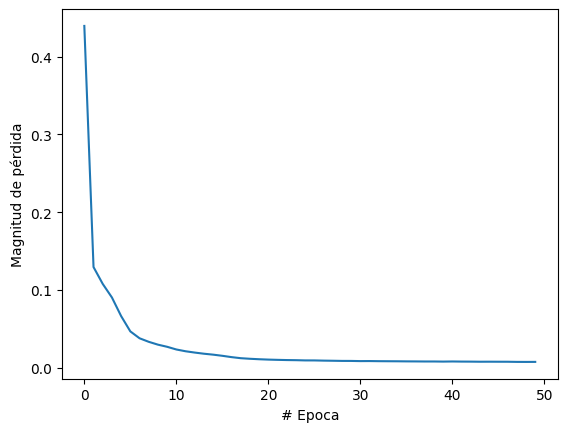

In [18]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial1.history["loss"])

In [26]:
modelo1.save('../data/models/_modelo_entorno.h5')
#El nombre empieza con _ para no sobreescribir los modelos ya creados

In [20]:
for k in range(2):
    for i in range(4):
        #print("Hagamos una predicción!")
        test_input = np.array([[4,k,i]])
        resultado = modelo1.predict(test_input)
        print("El vector de entrada [y,x,a] es ",[4,k,i])
        print("El resultado es " + str(resultado) + "-> Redondeo:" + str(round(resultado[0][0]))+ ',' + str(round(resultado[0][1])))


1/1 [==============================] - 0s 74ms/step
El vector de entrada [y,x,a] es  [4, 0, 0]
El resultado es [[ 2.9441705  -0.01366308]]-> Redondeo:3,0
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [4, 0, 1]
El resultado es [[ 4.051264   -0.03094137]]-> Redondeo:4,0
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [4, 0, 2]
El resultado es [[ 3.9791193  -0.04658288]]-> Redondeo:4,0
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [4, 0, 3]
El resultado es [[3.9895802  0.99654084]]-> Redondeo:4,1
1/1 [==============================] - 0s 13ms/step
El vector de entrada [y,x,a] es  [4, 1, 0]
El resultado es [[2.946196   0.99098015]]-> Redondeo:3,1
1/1 [==============================] - 0s 13ms/step
El vector de entrada [y,x,a] es  [4, 1, 1]
El resultado es [[4.036234  0.9667385]]-> Redondeo:4,1
1/1 [==============================] - 0s 12ms/step
El vector de entrada [y,x,a] es 

Red para modelar la función de recompensa:

In [21]:
historial2 = modelo2.fit(X_train2, y_train2, epochs=20, batch_size=32, verbose=False, validation_data=(X_test2, y_test2))
print("Modelo entrenado!")

Modelo entrenado!


In [22]:
test_loss2 = modelo2.evaluate(X_test2, y_test2)
print(f'Test loss: {test_loss2}')

182/182 [==============================] - 0s 730us/step - loss: 0.0015
Test loss: 0.0015283678658306599


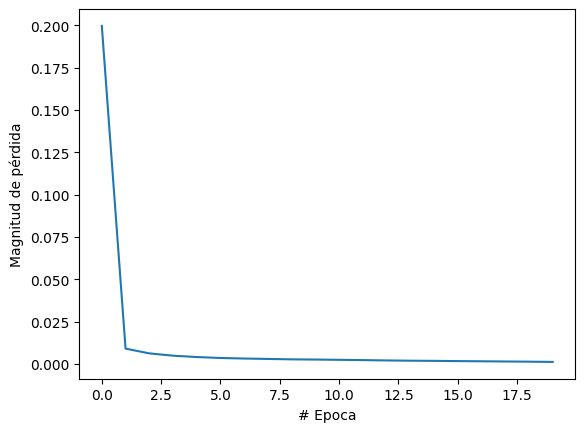

In [23]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial2.history["loss"])

In [24]:
for k in range(3,5):
    for i in range(4):
        #print("Hagamos una predicción!")
        test_input = np.array([[1,k,i]])
        resultado = modelo2.predict(test_input)
        print("El vector de entrada [y,x,a] es ",[1,k,i])
        print("El resultado es " + str(resultado[0]) + "-> Redondeo:" + str(round(resultado[0][0])))

1/1 [==============================] - 0s 49ms/step
El vector de entrada [y,x,a] es  [1, 3, 0]
El resultado es [0.21886712]-> Redondeo:0
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [1, 3, 1]
El resultado es [-0.008132]-> Redondeo:0
1/1 [==============================] - 0s 15ms/step
El vector de entrada [y,x,a] es  [1, 3, 2]
El resultado es [0.01215313]-> Redondeo:0
1/1 [==============================] - 0s 15ms/step
El vector de entrada [y,x,a] es  [1, 3, 3]
El resultado es [0.04398866]-> Redondeo:0
1/1 [==============================] - 0s 15ms/step
El vector de entrada [y,x,a] es  [1, 4, 0]
El resultado es [0.55599636]-> Redondeo:1
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [1, 4, 1]
El resultado es [0.04365476]-> Redondeo:0
1/1 [==============================] - 0s 14ms/step
El vector de entrada [y,x,a] es  [1, 4, 2]
El resultado es [-0.01184087]-> Redondeo:0
1/1 [==============================] - 0s

In [25]:
modelo2.save('../data/models/_modelo_reward.h5')
#El nombre empieza con _ para no sobreescribir los modelos ya creados